In [1]:
# Importing the libraries

# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Important sklearn libraries 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [3]:
# Importing the data
data = pd.read_excel('airline_dataset.xlsx')

# Data Sample
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Dimensions of data
data.shape

(10683, 11)

In [7]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Checking for duplicated values
data.duplicated().sum()

220

In [11]:
# Checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
# Dropping duplicated and null values
data_no_duplies = data.drop_duplicates(keep='first')

data_no_duplies.dropna(inplace=True)

In [15]:
data_no_duplies.shape

(10462, 11)

In [17]:
# Checking for airlines in the dataset
data_no_duplies['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
# Seperating day, month and year form 'Date_of_Journey'
data_no_duplies['journey_day'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.day
data_no_duplies['journey_month'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.month
data_no_duplies['journey_year'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.year

In [21]:
# Checking the information of the new dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [23]:
# Checking for the number of years
data_no_duplies['journey_year'].value_counts() 

journey_year
2019    10462
Name: count, dtype: int64

In [25]:
# Seperating hours and minutes from 'Dep_Time' and 'Arrival_Time'

# 'Dep_Time' into hours and minutes
data_no_duplies['Dep_hour'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.hour
data_no_duplies['Dep_minute'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.minute

# 'Arrival_Time' into hours and minutes
data_no_duplies['Arrival_hour'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.hour
data_no_duplies['Arrival_minute'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.minute

In [27]:
# Checking the information about the dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
 14  Dep_hour         10462 non-null  int32 
 15  Dep_minute       10462 non-null  int32 
 16  Arrival_hour     10462 non-null  int32 
 17  Arrival_minute   10462 non-null  int

In [29]:
# Now seperting hours and minutes in 'Duration'
duration = list(data_no_duplies['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [31]:
# Creating new columns from 'Duration' 
data_no_duplies['Duration_hours'] = duration_hours
data_no_duplies['Duration_minutes'] = duration_minutes

In [33]:
# Checking the information about the columns
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Date_of_Journey   10462 non-null  object
 2   Source            10462 non-null  object
 3   Destination       10462 non-null  object
 4   Route             10462 non-null  object
 5   Dep_Time          10462 non-null  object
 6   Arrival_Time      10462 non-null  object
 7   Duration          10462 non-null  object
 8   Total_Stops       10462 non-null  object
 9   Additional_Info   10462 non-null  object
 10  Price             10462 non-null  int64 
 11  journey_day       10462 non-null  int32 
 12  journey_month     10462 non-null  int32 
 13  journey_year      10462 non-null  int32 
 14  Dep_hour          10462 non-null  int32 
 15  Dep_minute        10462 non-null  int32 
 16  Arrival_hour      10462 non-null  int32 
 17  Arrival_minute   

In [35]:
# Dropping the columns to form a new dataset
data_1 = data_no_duplies.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1)

In [37]:
# Cheking the information about the new dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Total_Stops       10462 non-null  object
 5   Additional_Info   10462 non-null  object
 6   Price             10462 non-null  int64 
 7   journey_day       10462 non-null  int32 
 8   journey_month     10462 non-null  int32 
 9   journey_year      10462 non-null  int32 
 10  Dep_hour          10462 non-null  int32 
 11  Dep_minute        10462 non-null  int32 
 12  Arrival_hour      10462 non-null  int32 
 13  Arrival_minute    10462 non-null  int32 
 14  Duration_hours    10462 non-null  int64 
 15  Duration_minutes  10462 non-null  int64 
dtypes: int32(7), int64(3), object(6)
memory usage: 1.1+ MB


In [39]:
# Data Sample
data_1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


# EDA

In [42]:
data_1['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

<Figure size 1500x700 with 0 Axes>

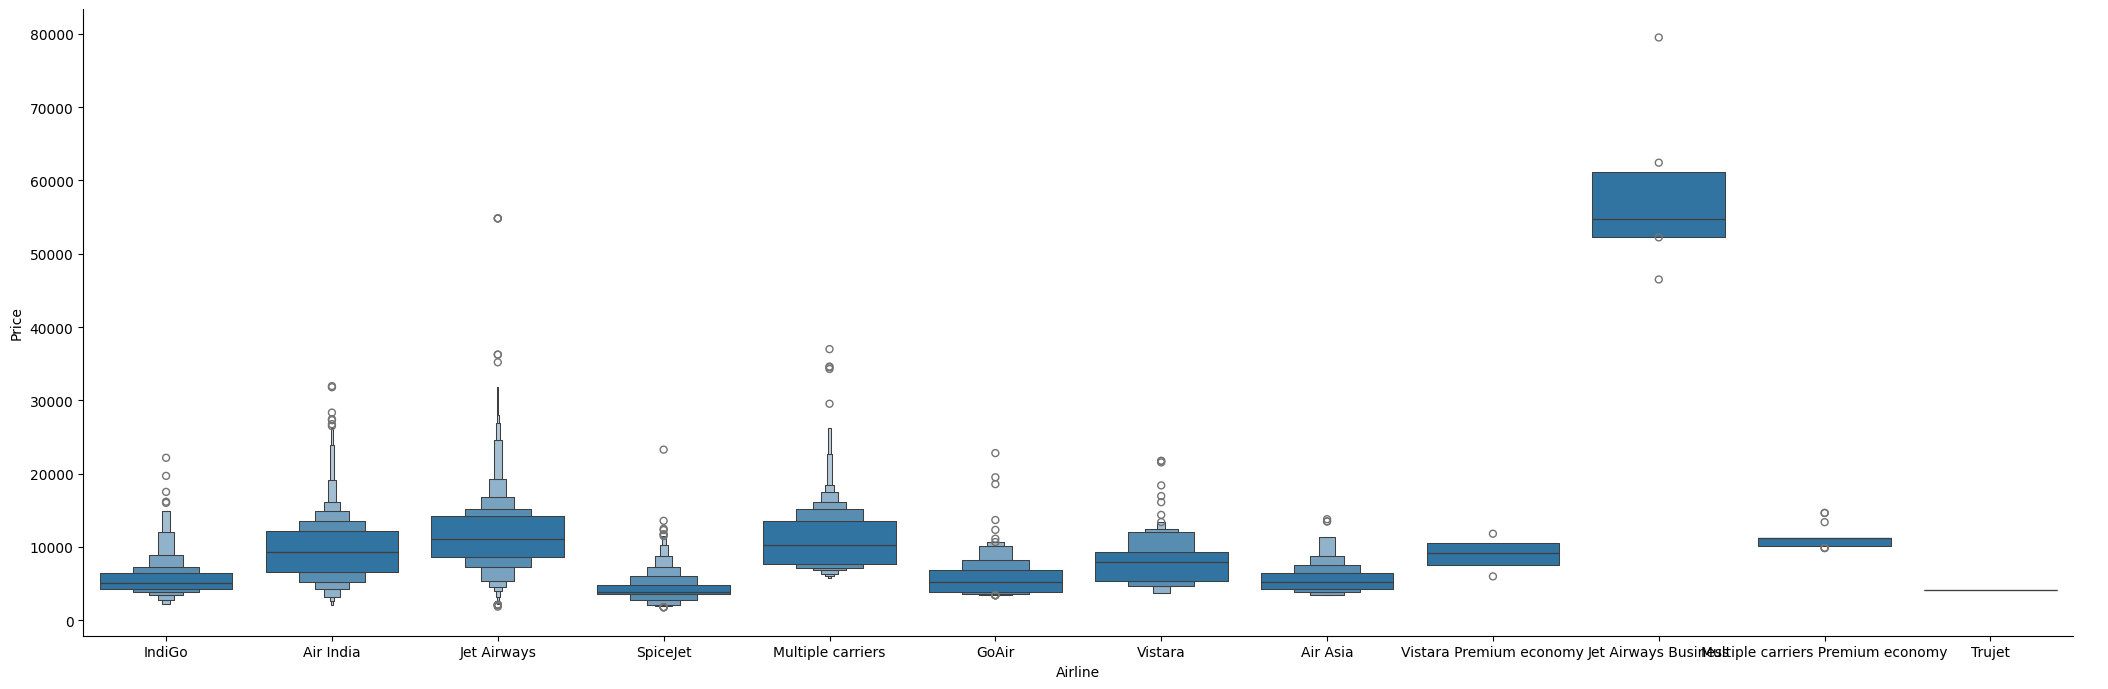

In [44]:
# Catplot to see prices according to airline 
plt.figure(figsize=(15, 7))
sns.catplot(data=data_1, x='Airline', y='Price', kind='boxen', height=7, aspect=3)
plt.show()

<Figure size 640x480 with 0 Axes>

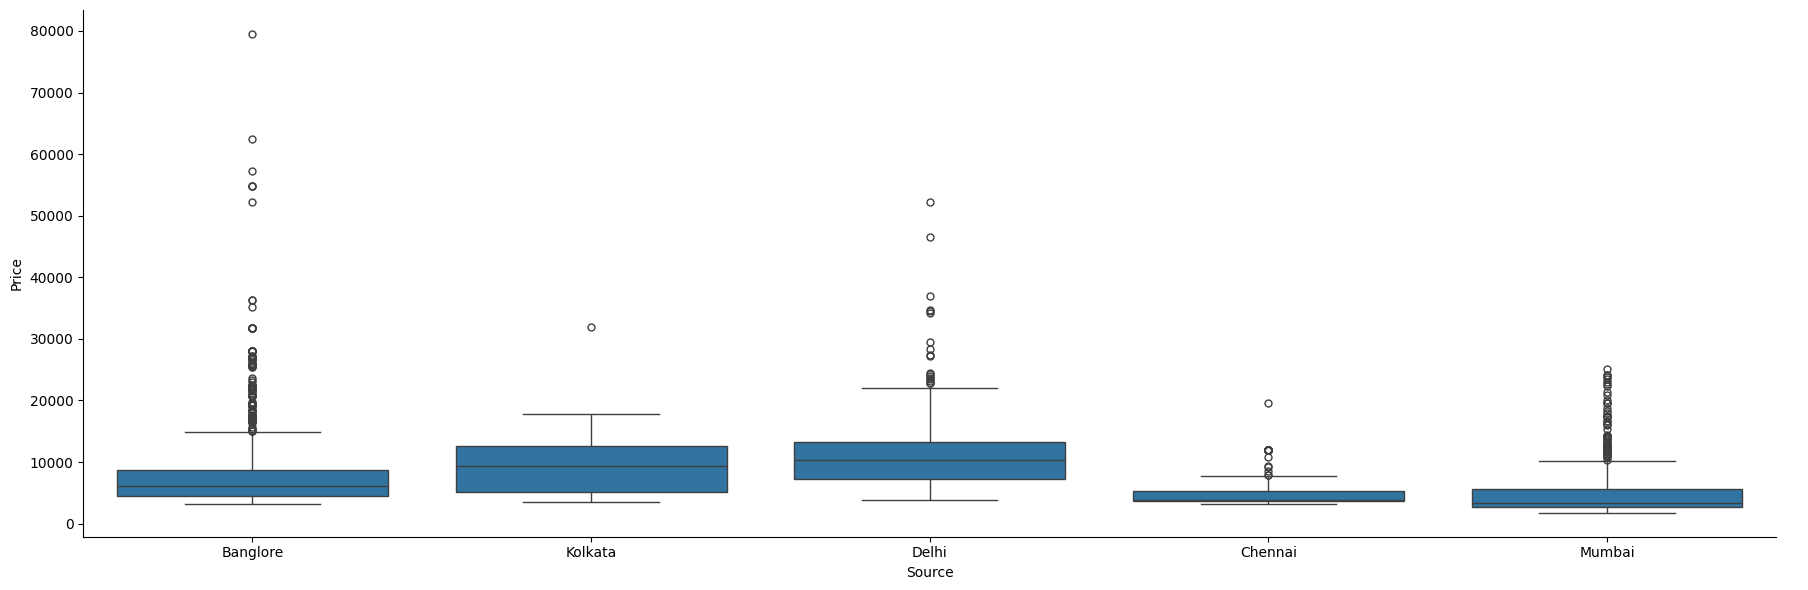

In [46]:
# Catplot to compare prices according to the source of the flight
plt.figure()
sns.catplot(data=data_1, x='Source', y='Price', kind='box', height=6, aspect=3)
plt.show()

<Figure size 640x480 with 0 Axes>

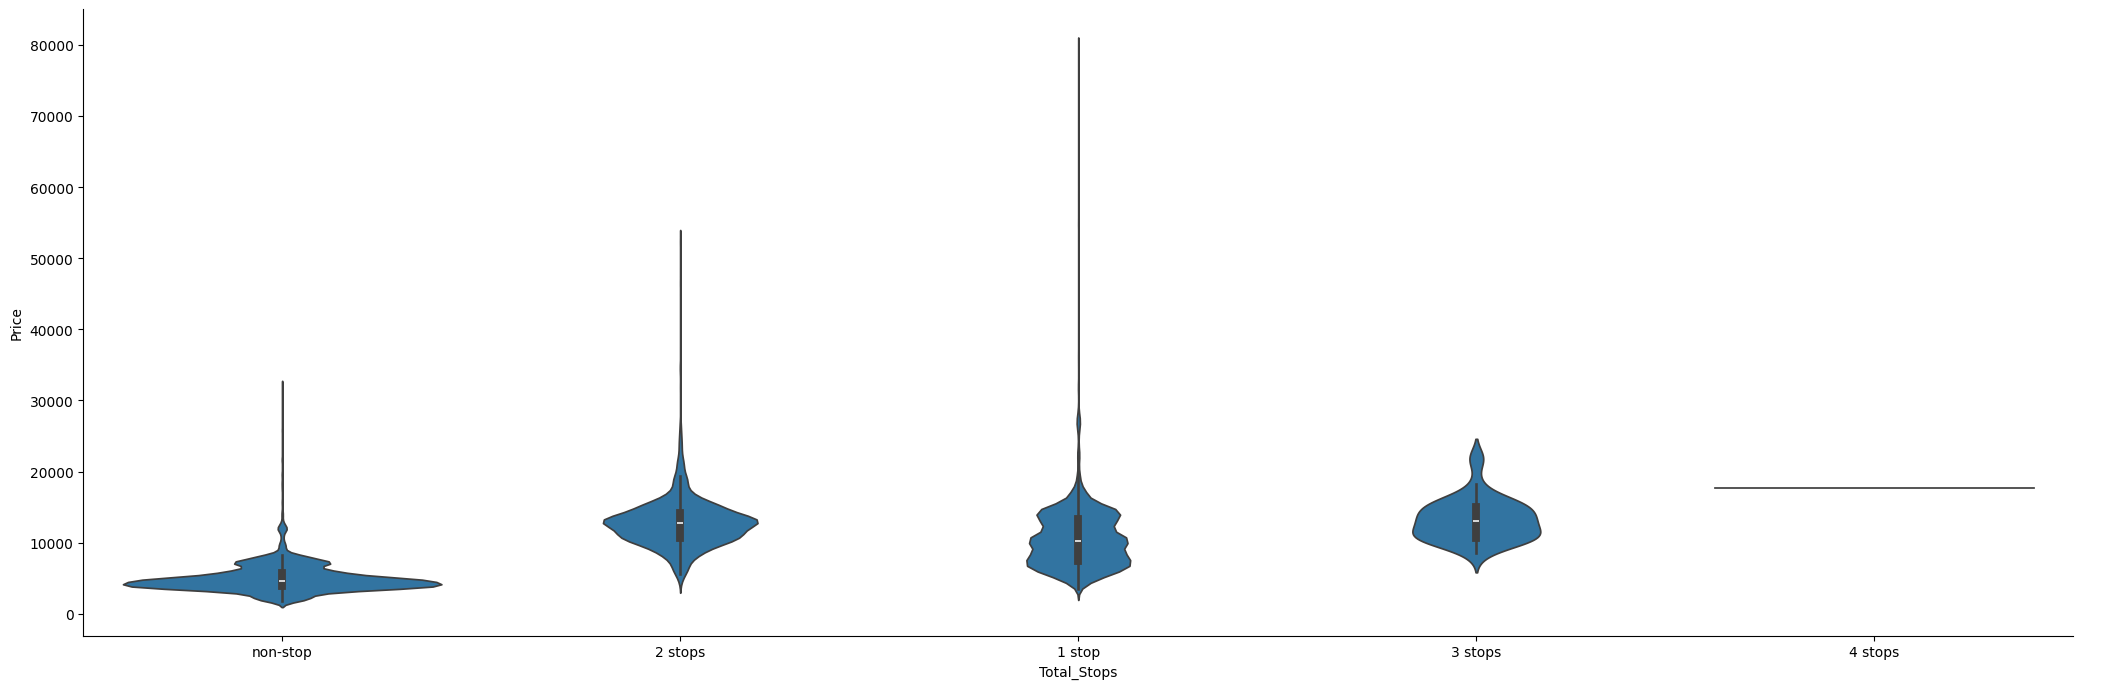

In [48]:
# Catplot for comparing prices from different type of stops
plt.figure()
sns.catplot(data=data_1, x='Total_Stops', y='Price', kind='violin', height=7, aspect=3)
plt.show()

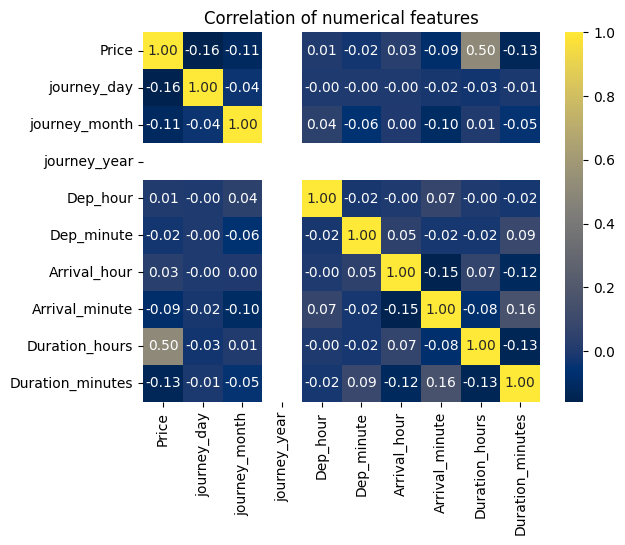

In [50]:
# Correaltion Matrix for numerical features
num_features = data_1.select_dtypes(include=['int', 'float']).columns.tolist()

corr_matrix = data_1[num_features].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation of numerical features')
plt.show()

In [588]:
data_1['journey_year'].value_counts()

journey_year
2019    10462
Name: count, dtype: int64

In [590]:
data_1.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
journey_day         0
journey_month       0
journey_year        0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [586]:
corr_matrix

,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
Price,1.000000,-0.159044,-0.113396,NaN,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664
journey_day,-0.159044,1.000000,-0.038331,NaN,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244
journey_month,-0.113396,-0.038331,1.000000,NaN,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325
journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,0.005155,-0.003394,0.040406,NaN,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843
Dep_minute,-0.024155,-0.004741,-0.062636,NaN,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269
Arrival_hour,0.031023,-0.002448,0.001423,NaN,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687
Arrival_minute,-0.086163,-0.015086,-0.099261,NaN,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176
Duration_hours,0.504200,-0.029382,0.006410,NaN,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999
Duration_minutes,-0.131664,-0.009244,-0.046325,NaN,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000


# Train test and Dependency split

In [103]:
# Dependency split
X = data_1.drop(['Price', 'Additional_Info', 'journey_year', 'Route'], axis=1)
Y = data_1['Price']

# Dimensions of the data
print(X.shape)
print(Y.shape)

(10462, 12)
(10462,)


In [105]:
# Data Sample
X.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,1,3,16,50,21,35,4,45


In [107]:
# Data Sample 'Y'
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [129]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Dimensions of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8369, 12)
(8369,)
(2093, 12)
(2093,)


In [131]:
# Data samples
x_train.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,Jet Airways,Kolkata,Banglore,1 stop,1,4,18,55,9,20,14,25
4810,Air India,Kolkata,Banglore,2 stops,6,6,10,0,5,25,19,25
9046,Air Asia,Kolkata,Banglore,2 stops,24,5,15,10,23,30,8,20
7550,Multiple carriers,Delhi,Cochin,1 stop,15,5,6,0,19,15,13,15
266,IndiGo,Delhi,Cochin,1 stop,24,6,11,25,1,30,14,5


In [133]:
y_train.head()

3154     7064
4810    13007
9046     5192
7550     8266
266      5684
Name: Price, dtype: int64

In [135]:
x_test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,SpiceJet,Kolkata,Banglore,non-stop,27,3,6,55,9,35,2,40
9830,IndiGo,Delhi,Cochin,1 stop,15,4,7,35,16,10,8,35
1506,SpiceJet,Kolkata,Banglore,non-stop,1,4,22,20,0,40,2,20
4587,IndiGo,Delhi,Cochin,non-stop,3,3,14,30,17,35,3,5
8189,Jet Airways,Banglore,New Delhi,1 stop,12,3,7,0,23,0,16,0


In [137]:
y_test.head()

3017     3815
9830     6442
1506     3873
4587     7673
8189    13817
Name: Price, dtype: int64

In [139]:
# Encoding the training data
x_train['Total_Stops'] = x_train['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Collecting the categorical and numerical columns
cat_columns = x_train.select_dtypes(include='object').columns.tolist()
num_columns = x_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Implementing OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype='int', handle_unknown='ignore')
x_train_cat_encoded = pd.DataFrame(ohe.fit_transform(x_train[cat_columns]), index=x_train.index, columns=ohe.get_feature_names_out())
x_train_encoded = pd.concat([x_train_cat_encoded, x_train[num_columns]], axis=1)

# Data Sample
x_train_encoded.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,0,0,0,1,0,0,0,0,0,0,...,0,1,1,4,18,55,9,20,14,25
4810,1,0,0,0,0,0,0,0,0,0,...,0,2,6,6,10,0,5,25,19,25
9046,0,0,0,0,0,0,0,0,0,0,...,0,2,24,5,15,10,23,30,8,20
7550,0,0,0,0,0,1,0,0,0,0,...,0,1,15,5,6,0,19,15,13,15
266,0,0,1,0,0,0,0,0,0,0,...,0,1,24,6,11,25,1,30,14,5


In [141]:
print(x_train_encoded.shape)

(8369, 28)


In [143]:
# Scaling the training columns
scaler = StandardScaler()

# Implementing StandardScaler
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_encoded), index=x_train_encoded.index, columns=scaler.get_feature_names_out())

# Data Sample
x_train_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,0.292750,-1.473304,-0.599144,0.966414,1.633190,-0.635450,-0.284844,0.471312,-0.186959
4810,2.250443,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,1.798602,-0.885098,1.119826,-0.428205,-1.298464,-1.218525,0.015013,1.065850,-0.186959
9046,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,1.798602,1.232441,0.260341,0.443432,-0.765436,1.405312,0.314869,-0.242135,-0.483802
7550,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,2.778076,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,0.292750,0.173671,0.260341,-1.125515,-1.298464,0.822237,-0.584700,0.352404,-0.780645
266,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,0.292750,1.232441,1.119826,-0.253878,0.034106,-1.801600,0.314869,0.471312,-1.374332


In [145]:
# Encoding and Scaling the test data
x_test['Total_Stops'] = x_test['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

x_test_cat_encoded = pd.DataFrame(ohe.transform(x_test[cat_columns]), index=x_test.index, columns=ohe.get_feature_names_out())
x_test_encoded = pd.concat([x_test_cat_encoded, x_test[num_columns]], axis=1)

x_test_scaled = pd.DataFrame(scaler.transform(x_test_encoded), index=x_test_encoded.index, columns=scaler.get_feature_names_out())

# Data Sample
x_test_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,-0.215679,-0.018937,...,-0.309363,-1.213103,1.585365,-1.458629,-1.125515,1.633190,-0.635450,0.614725,-0.955581,0.703571
9830,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,0.292750,0.173671,-0.599144,-0.951187,0.567134,0.384931,-0.884556,-0.242135,0.406727
1506,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,-0.215679,-0.018937,...,-0.309363,-1.213103,-1.473304,-0.599144,1.663724,-0.232408,-1.947369,0.914581,-0.955581,-0.483802
4587,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,-0.309363,-1.213103,-1.238022,-1.458629,0.269104,0.300620,0.530700,0.614725,-0.836673,-1.374332
8189,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,-0.215679,-0.018937,...,3.232445,0.292750,-0.179252,-1.458629,-0.951187,-1.298464,1.405312,-1.484269,0.709127,-1.671175


In [147]:
x_test_encoded.shape

(2093, 28)

# Model Building

## Linear Regresion

In [149]:
# Model Building
lr_model = LinearRegression()

# Fitting the data
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [151]:
# Prediction
y_pred_lr = lr_model.predict(x_test_scaled)

# Model score
print('Linear Regression score:', round(lr_model.score(x_test_scaled, y_test)*100, 2))

Linear Regression score: 61.02


In [576]:
# Hyperparameter Tuning for Linear Regression
lr_params = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# Using GridSearchCV for Hyperparameter Tuning
grid_search_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=lr_params,
    scoring='r2',
    verbose=1,
    n_jobs=None,
    refit=True
)

# Fitting the data
grid_search_lr.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=1)

In [578]:
# Storing the best model
best_model_lr = grid_search_lr.best_estimator_

# Prediction
y_pred_lr_final = best_model_lr.predict(x_test_scaled)

In [584]:
y_pred_lr_final

array([-6401.35674064, -1783.67177737, -4098.83690112, ...,
        5774.74779548,  2298.06209537,  5249.89350044])

In [153]:
# Metrics for model performance
print('R2_Score:', r2_score(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr))

R2_Score: 0.6101767290507073
MAE: 1929.8667231768038
MSE: 7144784.000325835
RMSE: 2672.9728768406603
MAPE: 0.24150712642026273


In [582]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Linear Regression scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr))

# After hyperparameter tuning
print('\n-----> Linear Regression (with GridSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lr_final))
print('MAE:', mean_absolute_error(y_test, y_pred_lr_final))
print('MSE:', mean_squared_error(y_test, y_pred_lr_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lr_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr_final))

-----> Linear Regression scores <-----
R2_Score: 0.6101767290507073
MAE: 1929.8667231768038
MSE: 7144784.000325835
RMSE: 2672.9728768406603
MAPE: 0.24150712642026273

-----> Linear Regression (with GridSearchCV) scores <-----
R2_Score: -3.7871333242412684
MAE: 8945.01909398186
MSE: 87739845.54378924
RMSE: 9366.954977141144
MAPE: 1.1986203828568807


## Decision Tree Regressor

In [308]:
# Model Building
dt_model = DecisionTreeRegressor(random_state=35, criterion='absolute_error', max_depth=15, min_samples_split=28, min_samples_leaf=9)

# Fitting the data
dt_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_leaf=9, min_samples_split=28,
                      random_state=35)

In [310]:
# Prediction
y_pred_dt = dt_model.predict(x_test_scaled)

# Model score
print('Decision Tree score: ', round(dt_model.score(x_test_scaled, y_test)*100, 2), '%')

Decision Tree score:  75.05 %


In [312]:
# Metrics for model performance
print('R2_Score:', r2_score(y_test, y_pred_dt))
print('MAE:', mean_absolute_error(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('RMSE:', root_mean_squared_error(y_test, y_pred_dt))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_dt))

R2_Score: 0.7505191308819668
MAE: 1282.1858576206403
MSE: 4572551.345437172
RMSE: 2138.352483908388
MAPE: 0.14401655613780773


## Extra Trees Regressor

In [552]:
# Model Building
et_model = ExtraTreesRegressor(criterion='absolute_error', max_depth=12, min_samples_split=6, random_state=24)
 
# Fitting the data
et_model.fit(x_train_scaled, y_train)

ExtraTreesRegressor(criterion='absolute_error', max_depth=12,
                    min_samples_split=6, n_estimators=93, random_state=24)

In [554]:
# Prediction
y_pred_et = et_model.predict(x_test_scaled)

# Model score
print('Extra Trees Regressor score: ', round(et_model.score(x_test_scaled, y_test)*100, 2), '%')

Extra Trees Regressor score:  81.78 %


In [426]:
print('R2_score:', r2_score(y_test, y_pred_et))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_et))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_et))
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred_et))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_et))

R2_score: 0.817833438125361
Mean Absolute Error: 1192.0743287147636
Mean Squared Error: 3338796.920734854
Root Mean Squared Error: 1827.2375107617656
Mean Absolute Percentage Error: 0.13707334609335298
